In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
import scipy
warnings.filterwarnings('ignore')


In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [6]:
import tensorflow as tf 
import os 

In [7]:
import pandas as pd
import os

images_folder = "D:/IMAGECLASSIFICATIONTEST/DATA"

input_path = []
label = []

for class_name in os.listdir(images_folder):
    class_path = os.path.join(images_folder, class_name)
    for path in os.listdir(class_path):
        input_path.append(os.path.join(images_folder, class_name, path))
        label.append(class_name)

df = pd.DataFrame({'images': input_path, 'label': label})

print(df.head())


                                              images label
0  D:/IMAGECLASSIFICATIONTEST/DATA\Ant\2916391131...   Ant
1  D:/IMAGECLASSIFICATIONTEST/DATA\Ant\apple-touc...   Ant
2  D:/IMAGECLASSIFICATIONTEST/DATA\Ant\b3BwZXIuan...   Ant
3  D:/IMAGECLASSIFICATIONTEST/DATA\Ant\b3BwZXIuan...   Ant
4  D:/IMAGECLASSIFICATIONTEST/DATA\Ant\bC5qcGc (1...   Ant


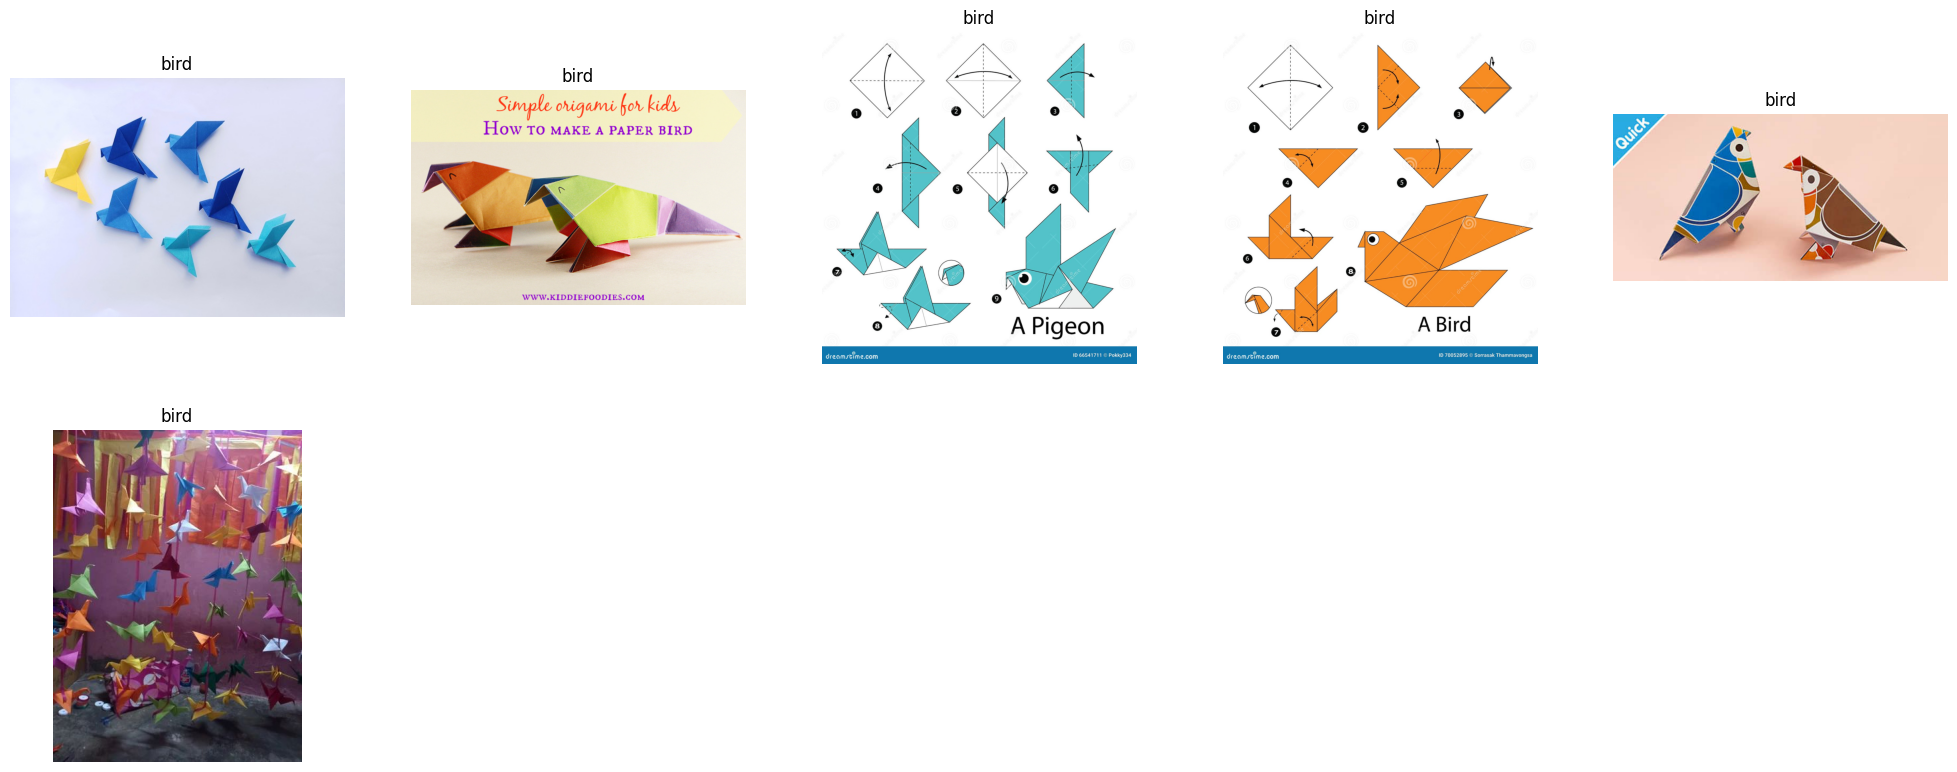

In [8]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image

plt.figure(figsize=(25, 25))
temp = df[df['label'] == 'Bird']['images']
start = random.randint(0, len(temp))
files = temp[start:start + 25]

for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)
    img = Image.open(file)
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    img = np.array(img)
    plt.imshow(img)
    plt.title('bird')
    plt.axis('off')

plt.show()


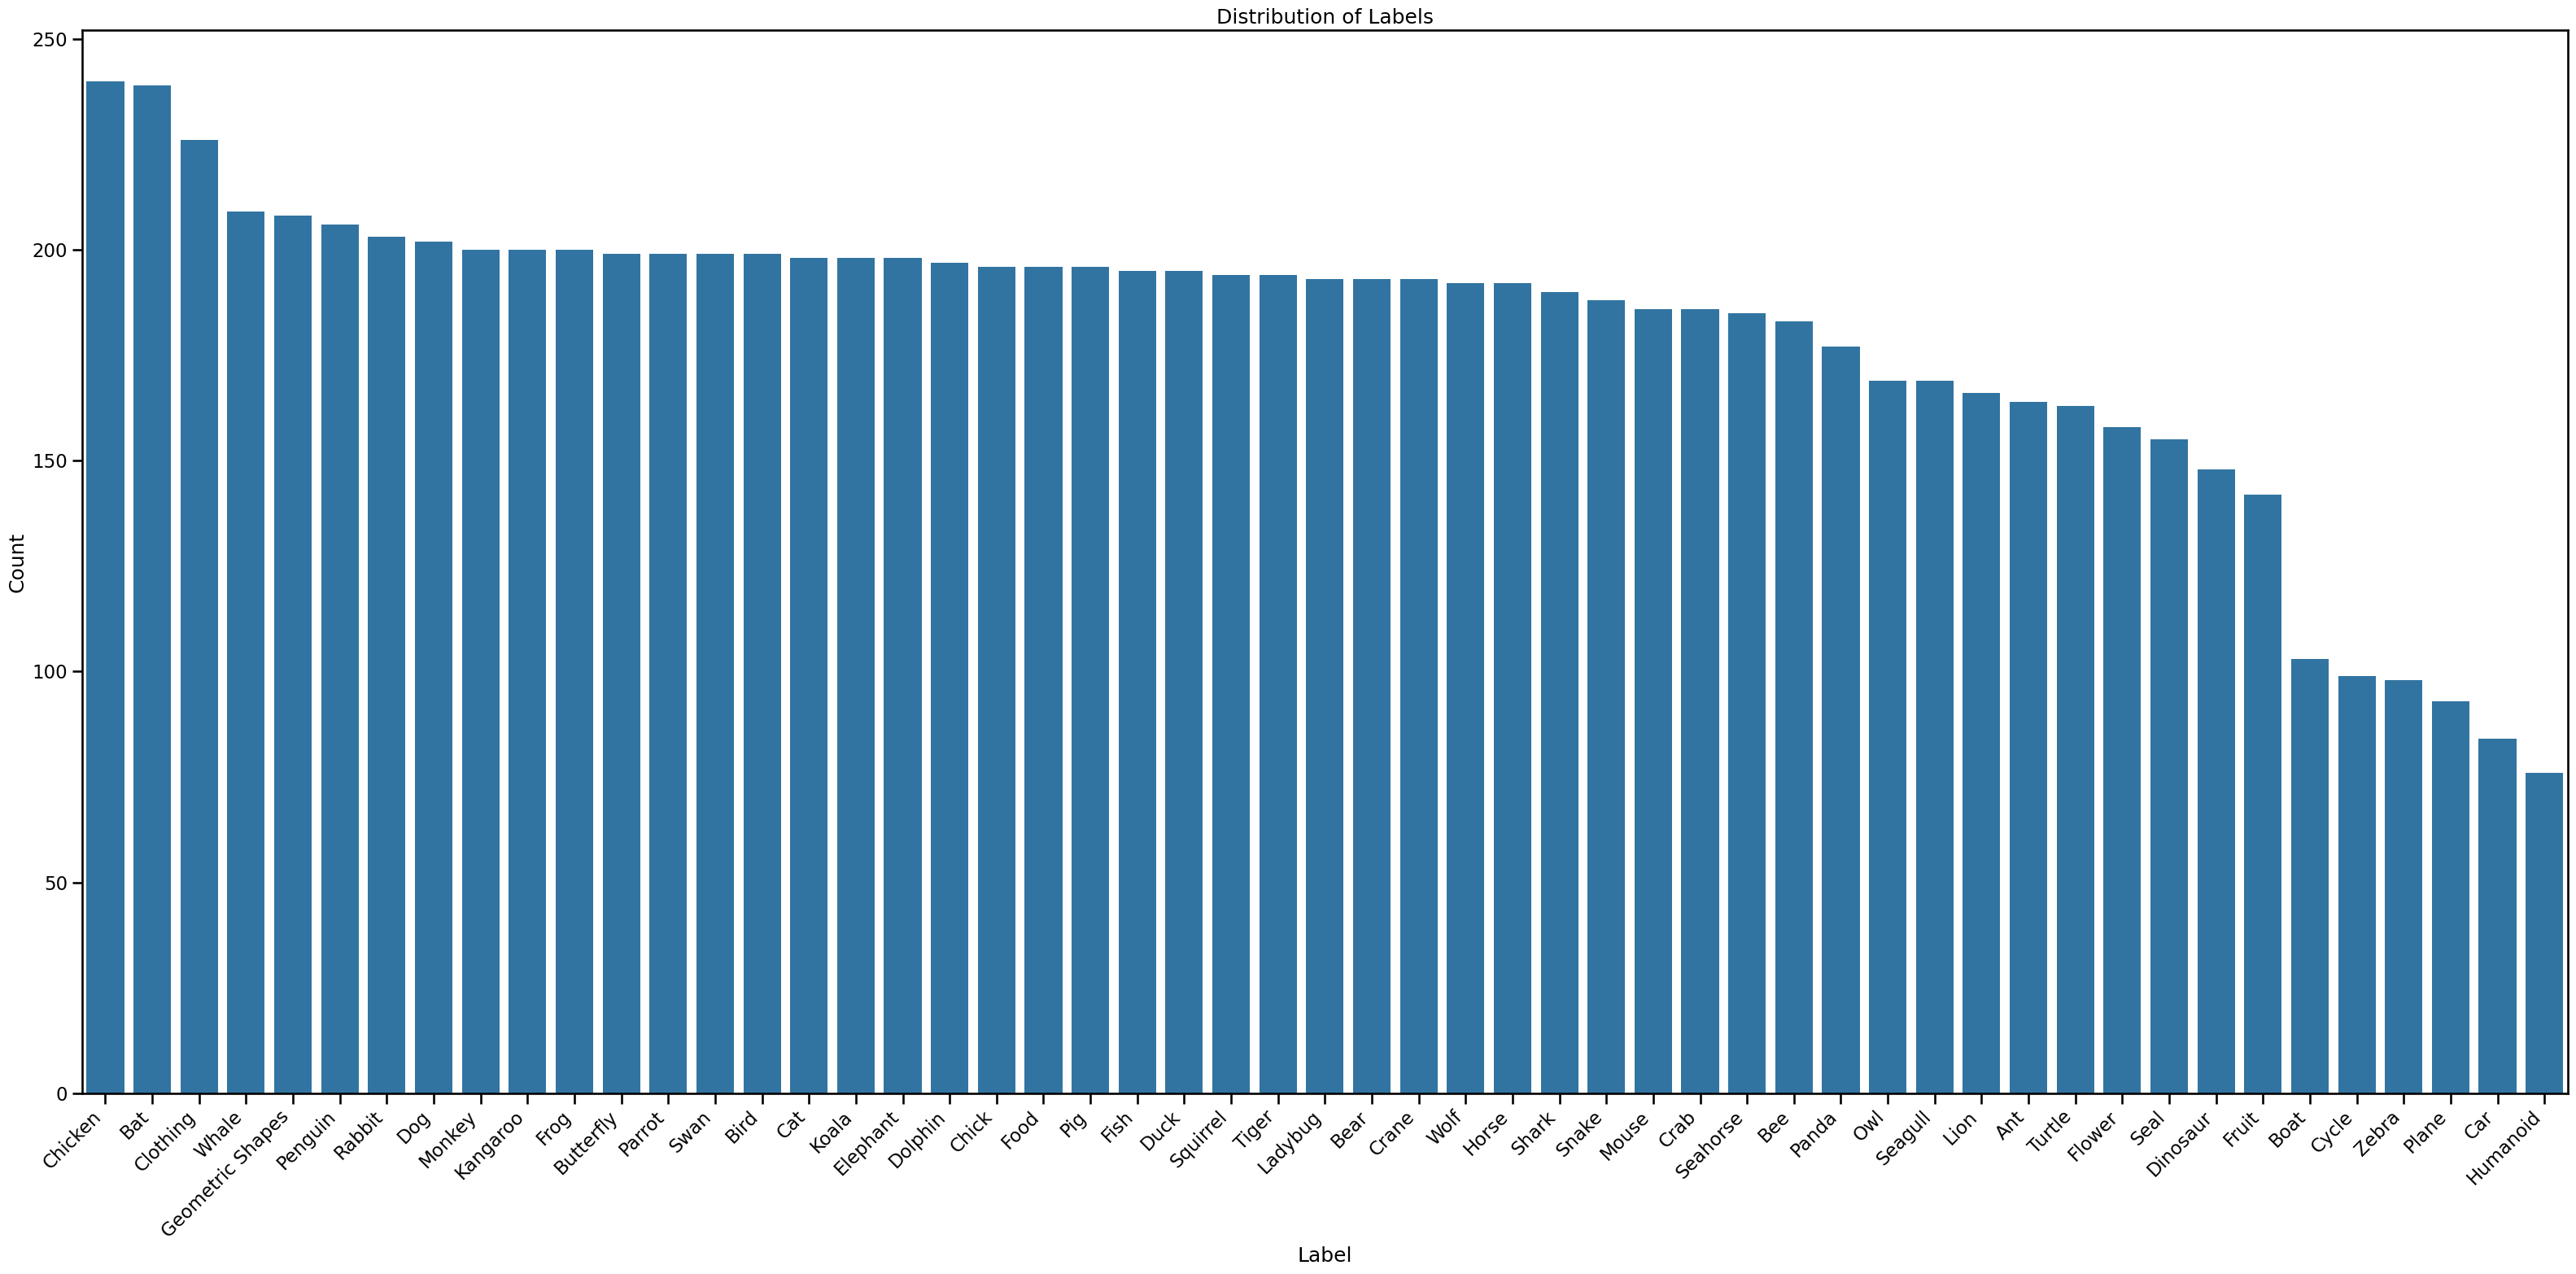

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

plt.figure(figsize=(32, 16))
ax = sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts())

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    channel_shift_range=50,
    vertical_flip=True,
)

val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 7621 validated image filenames belonging to 53 classes.
Found 1907 validated image filenames belonging to 53 classes.


In [12]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

num_classes = 53

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        

In [14]:
%pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
dm-tree                      0.1.8
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.0
gast                         0.5.4
google-auth                  2.25.2
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.19.0
jedi                         0.19.

In [15]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator, callbacks=None)
model.save('ImageClassify.h5')


Epoch 1/50


239/239 [==============================] - 202s 828ms/step - loss: 3.9217 - accuracy: 0.0353 - val_loss: 3.7850 - val_accuracy: 0.0556
Epoch 2/50
239/239 [==============================] - 103s 432ms/step - loss: 3.7711 - accuracy: 0.0597 - val_loss: 3.6958 - val_accuracy: 0.0724
Epoch 3/50
239/239 [==============================] - 102s 428ms/step - loss: 3.6537 - accuracy: 0.0863 - val_loss: 3.6111 - val_accuracy: 0.0891
Epoch 4/50
239/239 [==============================] - 102s 428ms/step - loss: 3.5398 - accuracy: 0.1048 - val_loss: 3.4798 - val_accuracy: 0.1154
Epoch 5/50
239/239 [==============================] - 103s 429ms/step - loss: 3.4660 - accuracy: 0.1228 - val_loss: 3.4533 - val_accuracy: 0.1148
Epoch 6/50
239/239 [==============================] - 103s 431ms/step - loss: 3.4192 - accuracy: 0.1365 - val_loss: 3.3686 - val_accuracy: 0.1306
Epoch 7/50
239/239 [==============================] - 103s 429ms/step - loss: 3.3785 - accuracy: 0.1394 - val_loss: 3.4128

In [17]:
print(history.history['accuracy'])  # Training accuracy
print(history.history['val_accuracy'])  # Validation accuracy

[0.0352972038090229, 0.05970345064997673, 0.08634037524461746, 0.10484188795089722, 0.12281852960586548, 0.13646502792835236, 0.13935178518295288, 0.14788085222244263, 0.15063640475273132, 0.1575908660888672, 0.17071250081062317, 0.17661723494529724, 0.17740453779697418, 0.18698333203792572, 0.18987008929252625, 0.19039496779441833, 0.2028605192899704, 0.2083716094493866, 0.21152079105377197, 0.2221493273973465, 0.22477364540100098, 0.22752919793128967, 0.24078205227851868, 0.24327516555786133, 0.23172812163829803, 0.2541661262512207, 0.25337880849838257, 0.2546909749507904, 0.2550846338272095, 0.2613830268383026, 0.2668941020965576, 0.27201154828071594, 0.2727988362312317, 0.27647289633750916, 0.2794908881187439, 0.2838210165500641, 0.29038184881210327, 0.2867077887058258, 0.291169136762619, 0.29418712854385376, 0.2958929240703583, 0.3003542721271515, 0.3053404986858368, 0.3071775436401367, 0.31833091378211975, 0.3132134974002838, 0.3092769980430603, 0.32489174604415894, 0.32804092764

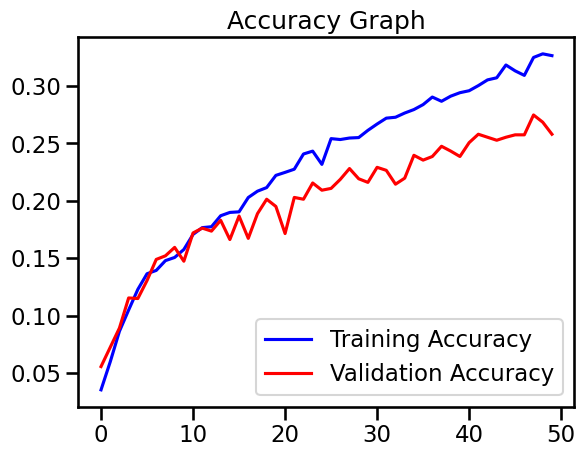

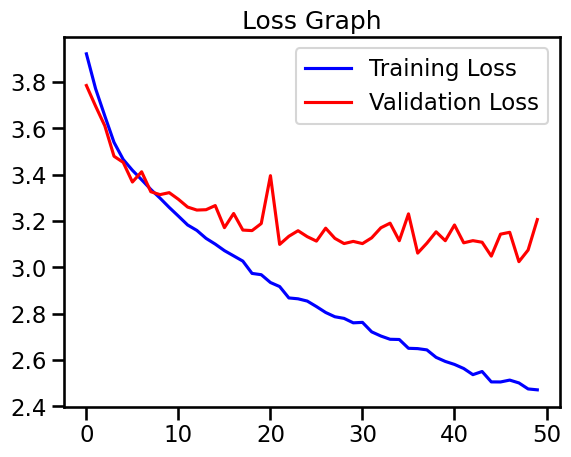

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

1/1 [==============================] - 0s 30ms/step


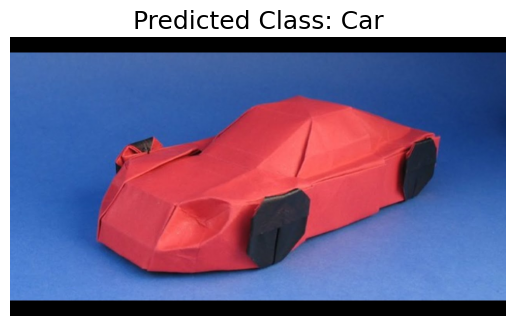

In [22]:
from keras.preprocessing.image import img_to_array
#Testing with input image

def preprocess_input_image(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, 128, 128, 3))
    img_array = img_array / 255.0
    return img_array

input_image_path = 'maxresdefault.jpg'
input_image = preprocess_input_image(input_image_path)

predictions = model.predict(input_image)

predicted_class_index = np.argmax(predictions)
predicted_class = df['label'].unique()[predicted_class_index]

plt.imshow(load_img(input_image_path))
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
